<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_05_ZerosFunciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Actividad 5
### Métodos computacionales para físicos  y astrónomos
### Universidad de Antioquia
### Prof: Hernan D. Salinas Jiménez
Ref: https://github.com/restrepo/ComputationalMethods


In an IPython notebook, use the scipy implementation and find the first solution to the equation, write a function with the bisection methods.

What is the solution if a=1, and b=1, what is the solution if a=2 and b=2
  
1. $ 7 = a\sqrt{x^2+1}+be^x\sin x $
   



  
 2. $a e^{x}-2= b\cos(e^x-2)$

In [1]:
#TRABAJO REALZIADO EN CLASE
import numpy as np
from scipy import optimize
import math
import matplotlib.pyplot as plt


In [2]:
def f(x):
  return (x**2 - 1)
from scipy import optimize

root = optimize.bisect(f, 0, 2)
root

root = optimize.bisect(f, -2, 0)
root
-1.0


-1.0

In [3]:
def f(x,a,b):
  return a*np.sqrt(x**2+1)+b*np.exp(x)*np.sin(x)-7

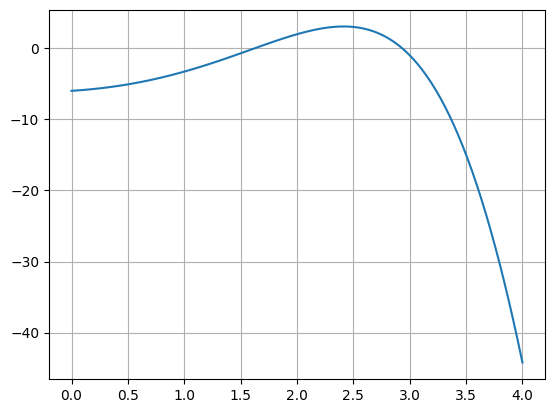

In [4]:
x=np.linspace(0,4,100)
params=(1,1)
plt.plot(x,f(x,*params))
plt.grid()
plt.plot(root)

In [5]:
#con a=1 y b=1
root=optimize.bisect(f,1,2,args=(1,1),xtol=2e-17)
root

1.628718494927008

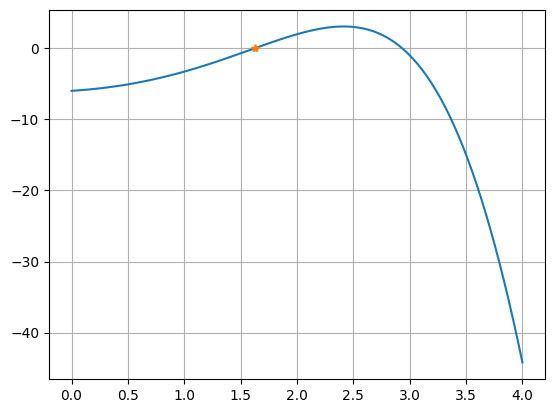

In [6]:
x=np.linspace(0,4,100)
params=(1,1)
plt.plot(x,f(x,*params))
plt.grid()
plt.plot(root,0,'*')

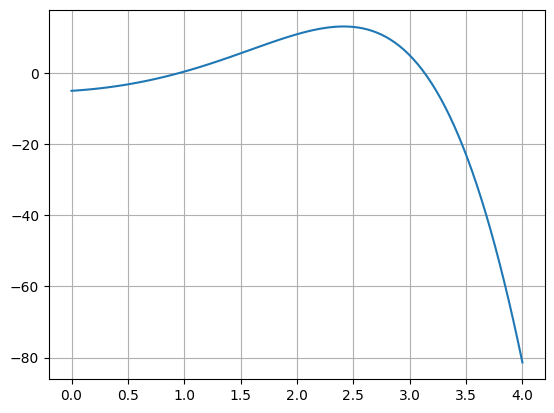

In [7]:
x=np.linspace(0,4,100)
params=(2,2)
plt.plot(x,f(x,*params))
plt.grid()

In [8]:
#con a=2 y b=2
root=optimize.bisect(f,3,4,args=(2,2),xtol=2e-17)
root

3.132350594242366

# **Método de bisección:**

1. $ 7 = a\sqrt{x^2+1}+be^x\sin x $

In [ ]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import sympy as sp

def f_(x):
  return ((x-1)**2)-1

optimize.bisect(f_,0,1)

0.0

In [ ]:
def f_1(x,a,b):
  return a*np.sqrt(x**2+1)+b*np.exp(x)*np.sin(x)-7
r=optimize.bisect(f_1,2,3,args=(1,1), xtol=2e-12)
r2=optimize.bisect(f_1,1,4,args=(2,2), xtol=2e-12)
print(r)
print(r2)

2.9321585327943467
3.1323505942423253


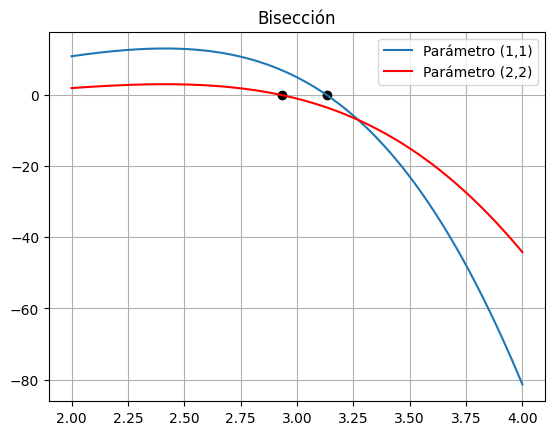

In [ ]:
x=np.linspace(2,4,1000)
params=(1,1)

params_2=(2,2)
plt.figure(facecolor="w")
plt.plot(r,0,'ko')
plt.plot(r2,0,'ko')
plt.plot(x,f_1(x,*params_2),label='Parámetro (1,1)')
plt.plot(x,f_1(x,*params),'r',label='Parámetro (2,2)')
plt.title('Bisección')
plt.legend()
plt.grid()


 2. $a e^{x}-2= b\cos(e^x-2)$

1.0076239716571536
0.6931471805604588


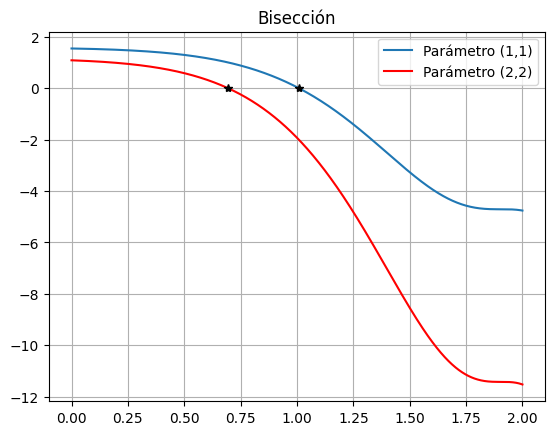

In [ ]:
def f_2(x,a,b):
  return b*np.cos(np.exp(x)-2)+2-a*np.exp(x)
r=optimize.bisect(f_2,0,9,args=(1,1), xtol=2e-12)
print(r)
r_2=optimize.bisect(f_2,0,9,args=(2,2), xtol=2e-12)
print(r_2)

x=np.linspace(0,2,1000)
params=(1,1)
params_2=(2,2)
plt.figure(facecolor="w")
plt.plot(x,f_2(x,*params),label='Parámetro (1,1)')
plt.plot(r,0,'*',color='k')
plt.plot(x,f_2(x,*params_2),'r',label='Parámetro (2,2)')
plt.plot(r_2,0,'*',color='k')
plt.title('Bisección')
plt.legend()
plt.grid()

**Metodo punto fijo:**

In [ ]:
optimize.fixed_point

<function scipy.optimize._minpack_py.fixed_point(func, x0, args=(), xtol=1e-08, maxiter=500, method='del2')>

Los puntos donde f se cruza en 0 son: 2.9321585327957544 y 1.6287184949270082


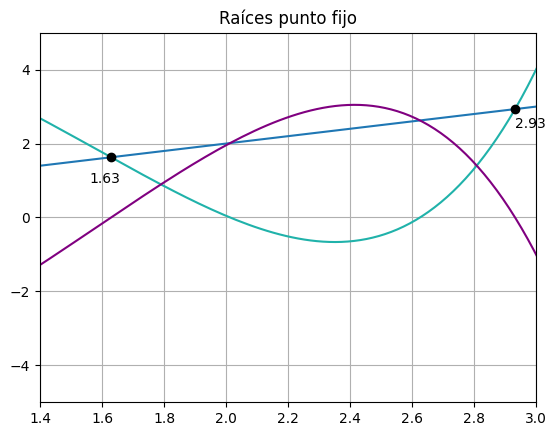

In [ ]:
x=np.linspace(-10,10,1000)
plt.figure(facecolor="w")

def i(x):
  return x

def f_s(x):
  return np.sqrt(x**2+1)+np.exp(x)*np.sin(x)-7

def g(x):
  return x-f_s(x)

P=optimize.fixed_point(g,3)
P_2=optimize.fixed_point(g,1.8)
print("Los puntos donde f se cruza en 0 son:", P,"y",P_2)
plt.plot(x,x)
plt.plot(x,g(x),color='lightseagreen')
plt.plot(x,f_s(x),color='purple')
plt.plot(P,P,"ko")
plt.text(P,P-0.5,f'{P:.3}')
plt.plot(P_2,P_2,"ko")
plt.text(P_2-0.07,P_2-0.7,f'{P_2:.3}')
plt.xlim(1.4,3)
plt.ylim(-5,5)
plt.title('Raíces punto fijo')
plt.grid()

3. Fixed point methods. 

When a new planet is discovered, there are different methods to estimate its physical properties. Many times is only possible to estimate either the planet mass or the planet radius and the other property has to be predicted through computer modelling.

If one has the planet mass, a very rough way to estimate its radius is to assume certain composition (mean density) and a homogeneous distribution (a very bad assumption!). For example, for the planet [Gliese 832c](http://es.wikipedia.org/wiki/Gliese_832_c) with a mass $M= 5.40 M_{\oplus}$, if we assume an earth-like composition, i.e. $\bar \rho_{\oplus} = 5520\ kg/m^3$, we obtain:

$$R_{g832c} = \left( \frac{3 M_{g832c}}{ 4 \pi \bar\rho_{\oplus} } \right)^{1/3} \approx 1.75 R_{\oplus}$$

That would be the planet radius if the composition where exactly equal to earth's.

A more realistic approach is assuming an internal one-layer density profile like:

$$\rho(r) = \rho_0 \exp\left( -\frac{r}{L} \right)$$

where $\rho_0$ is the density at planet centre and $L$ is a characteristic lenght depending on the composition. From numerical models of planet interiors, the estimated parameters for a planet of are $M= 5.40 M_{\oplus}$ are approximately $\rho_0 = 18000\ kg/m^3$ and $L = 6500\ km$.

Integrating over the planet volume, we obtain the total mass as

$$M = 4\pi \int_0^R \rho(r)r^2dr$$

This is a function of the mass in terms of the planet radius. 

Solving the equation $M(R) = M_{g832c}$ it would be possible to find a more realistic planet radius. However when using numerical models, it is not possible to approach the solution from the left side as a negative mass makes no sense.

In [ ]:
r=sp.symbols("r")
R=sp.symbols("R")
rho0=sp.symbols("rho0")
L=sp.symbols("L")
rho_=sp.symbols("rho_")


#La integral resulta para hallar el planeta es:
M=4*sp.pi*rho0*sp.integrate(r**2*sp.exp(-r/L),(r,0,R))
M

4*pi*rho0*(2*L**3 + (-2*L**3 - 2*L**2*R - L*R**2)*exp(-R/L))

Usamos la integral hallada para poder encontrar los valores posibles de la masa:

In [ ]:
def mass(R,L,rho):
  return 4*np.pi*rho*(2*L**3 + (-2*L**3-2*L**2*R-L*R**2)*np.exp(-R/L))

In [ ]:
def mass_g(Rterrestre, rho_):
  return (1.75*Rterrestre)**3*4*np.pi*rho_/3

In [ ]:
L=6500E3
rho=18000
rho_=5520
Rterrestre=6371E3
masa_tierra=5.972E24
mm=mass_g(Rterrestre, rho_)/masa_tierra
R=np.linspace(1,12000E3,1000)

#Definimos la función
F = (mass_g(Rterrestre, rho_)-mass(R,L,rho))/masa_tierra


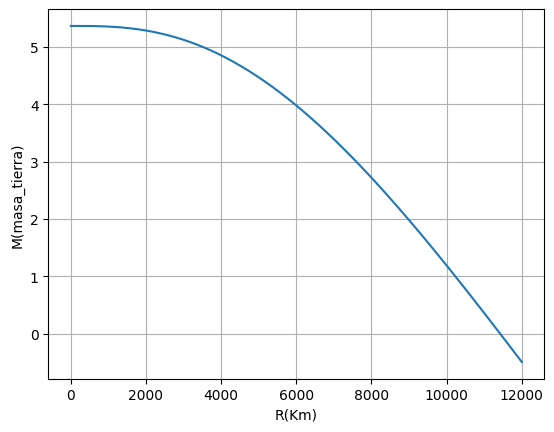

In [ ]:
plt.plot(R/1E3, F)
plt.xlabel("R(Km)")
plt.ylabel("M(masa_tierra)")
plt.grid()

Como se muestra enla gráfica la relación es inversa, mientras disminuya la masa del planeta, en cantidades de masas terrestres, aumenta el tamaño posible del planeta.

3. **ACTIVITY** 
    
In an IPython notebook and based on the routine NewtonRaphson, write your own routine SecantMethod that performs the previous steps for the Secant Method. Test your code with the function $f(x)$:
    
$f(x) = x - \cos(x)$
</font>

In [ ]:
import sympy as sp 
from sympy import sympify

In [ ]:
x= sp.Symbol('x')

def fun_(x):
  f=x-sp.cos(x)
  return f

#Hallamos la derivada de la función
d=sp.diff(fun_(x),x)
print(d)

sin(x) + 1


In [ ]:
func=sp.lambdify(x,fun_(x),"numpy")
dfunc=sp.lambdify(x,d,"numpy")
P_s=optimize.newton(func,2,dfunc)
print('La raiz hallada es', P_s)

La raiz hallada es 0.7390851332151607


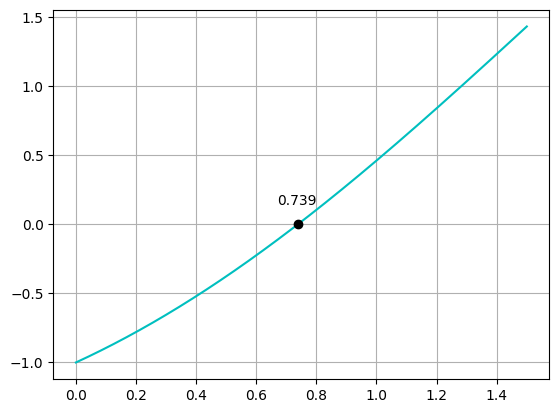

In [ ]:
x=np.linspace(0,1.5,1000)
plt.figure(facecolor="w")
plt.plot(x, func(x),'c')
plt.plot(P_s,0,'ko')
plt.text(P_s-0.07,P_s-0.6,f'{P_s:.3}')
plt.grid()

4. **ACTIVITY** (*No realizar*) 


It is known that light rays are deflected when they pass near by a gravitational field and that this deviation is proportional to the body mass which the light is interacting with and inversely proportional to the passing distance. 
Since it is common finding very massive structures in the universe and the measures that are done to study it involve photons, it makes sense to study what happens to a light source image when the rays get close to a grumpy object like a dark matter halo.  


In order to study the light deflection in these cases, it will be used the simplest model, gravitational lens theory, where the len is a very massive object. A sketch of a typical system is shown in the figure below. The source plane is the light source or image that is going to be affected,  $\eta$ is the distance from a image point to the line of sight and $\beta$ the subtended angle by the point. 
The lens plane corresponds to the mass that affects the light coming from the source, $\xi$ is the new image point distance to the line of sight, $\theta$ is the subtended angle by the new point position. Then, $\alpha$ is the deflection angle. 

Since from observations $\theta$ is known, the problem to be solved per pixel usually is 

\begin{equation}
\beta = \theta - \hat{\alpha}(\theta) 
\end{equation}

but $\alpha$ also depends on $\theta$ besides the len halo properties. This would allow construct the real image
from the distorted and magnified one. 

<img src="https://github.com/restrepo/ComputationalMethods/blob/master/material/figures/lente1.png?raw=1">

This equation can also be written in terms of distances 

\begin{equation}
\vec{\eta}  = \frac{D_s}{D_d} \vec{\xi} - D_{ds}\alpha ( \vec{\xi }) 
\end{equation}

The solution to the lens equation is easier to get if it is assumed that the len is axially symmetric. In this case, the deflection angle  takes the next form

$$ \hat{\alpha}(\vec{\xi}) = \frac{\vec{\xi}}{|\vec{\xi}|^2} \frac{8G\pi}{c^2} \int_0^\xi d\xi'\xi'\Sigma(\xi')$$

The quantity $\Sigma$ is the surface mass density, i.e., the len's mass enclosed inside $\xi$ circle per area unit.  
It is important to notice that the direction of $\alpha$ is the same as $\xi$ and consequently $\eta$. 


The problem to be solved is the next: Given the positions of a square find the image distorsion due to gravitational lensing, i.e., find the root of \xi in the trascendal equation it satisfies. Use the routines given below and all of 
the data for the len and image that is going to be distorted. 


# **CLASE**

**Método de Newton-Raphson:**
1.  $ 7 = a\sqrt{x^2+1}+be^x\sin x $
2. $a e^{x}-2= b\cos(e^x-2)$

In [ ]:
import sympy as sp 
from sympy import sympify

def f(x,a,b):
  f = a*sp.sqrt(x**2+1)+b*sp.exp(x)*sp.sin(x)-7
  return f

def funcion(x):
  f = np.sqrt(x**2+1)+np.exp(x)*np.sin(x)-7
  return f

def fprima(x):
  T1=np.exp(x)*np.cos(x)
  T2=np.exp(x)*np.sin(x)
  T3=x/np.sqrt(x**2+1)
  return T1+T2+T3

b= sp.Symbol('b')
a= sp.Symbol('a')
x= sp.Symbol('x')

#Calculamos la derivada:
sp.diff(f(x,1,1),x)


x/sqrt(x**2 + 1) + exp(x)*sin(x) + exp(x)*cos(x)

In [ ]:
f = a*sp.sqrt(x**2+1)+b*sp.exp(x)*sp.sin(x)-7
g=sp.lambdify(x,f,"numpy")
g(1)

1.4142135623731*a + 2.28735528717884*b - 7

In [ ]:
P=optimize.newton(funcion,2,fprima)
P1=optimize.newton(funcion,3,fprima)
print(P,P1)

1.6287184949270082 2.9321585327957487


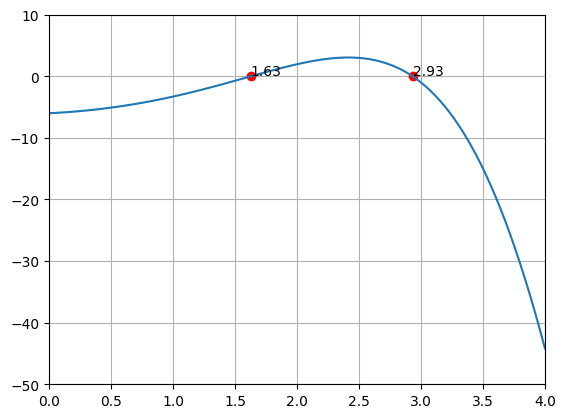

In [ ]:
x=np.linspace(0,4,100)
plt.figure(facecolor="w")
plt.plot(P,0,"ro")
plt.text(P,0.2,f'{P:.3}')
plt.plot(P1,0,"ro")
plt.text(P1,0.2,f'{P1:.3}')
plt.plot(x,funcion(x))
plt.xlim(0,4)
plt.ylim(-50,10)
plt.grid()

In [ ]:
x= sp.symbols('x')
def f_s(x):
  return -7+sp.sqrt(x**2+1)+sp.exp(x)*sp.sin(x)

In [ ]:
DF=sp.diff(f_s(x),x)
fun=sp.lambdify(x,f_s(x),"numpy")
DF_=sp.lambdify(x,DF,"numpy")

In [ ]:
optimize.newton(fun,3,DF_)

2.9321585327957487